In [8]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics, preprocessing, svm
from scipy.spatial import distance
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import seaborn as sns

data = pd.read_csv('Notebooks/Datasets/wholesale_customers_data.csv')
channel = data.Channel

In [9]:
Channel = data['Channel']
data = data.drop(columns=['Channel', 'Region'])
print(data)

     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0    12669   9656     7561     214              2674        1338
1     7057   9810     9568    1762              3293        1776
2     6353   8808     7684    2405              3516        7844
3    13265   1196     4221    6404               507        1788
4    22615   5410     7198    3915              1777        5185
..     ...    ...      ...     ...               ...         ...
435  29703  12051    16027   13135               182        2204
436  39228   1431      764    4510                93        2346
437  14531  15488    30243     437             14841        1867
438  10290   1981     2232    1038               168        2125
439   2787   1698     2510      65               477          52

[440 rows x 6 columns]


In [21]:
def distortions_Inertia(Data):
    distortions = []
    K = range(1, 10)
    for k in K:
        km = KMeans(n_clusters=k)
        km.fit(Data)
        distortions.append(sum(np.min(distance.cdist(Data, km.cluster_centers_, 'euclidean'), axis=1)) / Data.shape[0])

    plt.plot(K, distortions, 'bx-')
    plt.xlabel('K')
    plt.ylabel('Distortion')
    plt.title('Optimal K')
    plt.show()

    sum_of_squared_distances = []
    K = range(1,15)
    for k in K:
        km = KMeans(n_clusters=k)
        km.fit(Data)
        sum_of_squared_distances.append(km.inertia_)

    plt.plot(K, sum_of_squared_distances, 'bx-')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.title('Optimal K')
    plt.show()

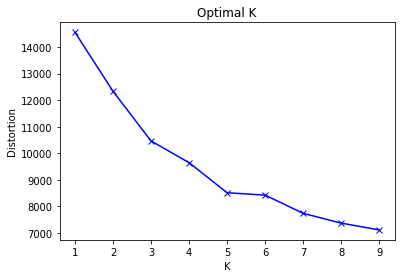

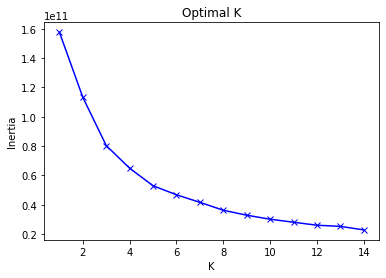

In [15]:
distortions_Inertia(data)

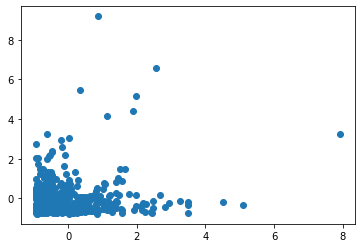

In [17]:
scalar = StandardScaler()
scalar.fit(data)
StandardScaler(copy=True, with_mean=True, with_std=True)
tra = scalar.fit_transform(data)
plt.scatter(tra[:, 0], tra[:, 1])

In [18]:
print("--k-means Data computation--")

km = KMeans(n_clusters=9)

km.fit(data)

print(km.cluster_centers_)


print("\n--k-means prediction--")
print(pd.Series(km.predict(data)).value_counts().sort_index())


print("--Scaled k-means computation--")

km = KMeans(n_clusters=9)
km.fit(tra)

print(km.cluster_centers_)


print("\n--Scaled k-means prediction--")
print(pd.Series(km.predict(tra)).value_counts().sort_index())


print("\n--PCA computation--")
pca = PCA(n_components=6)

X_r = pca.fit_transform(data)
print(X_r)

--k-means Data computation--
[[  8219.89473684  20841.10526316  29019.           2018.15789474
   12900.84210526   3307.78947368]
 [ 15657.6372549    2703.88235294   3716.21568627   3571.8627451
     820.33333333   1165.30392157]
 [  4783.05521472   2887.2208589    3390.36196319   2419.44785276
     958.09202454    903.92638037]
 [ 48835.5          3132.05555556   4672.           5576.38888889
     843.44444444   2272.11111111]
 [ 25603.          43460.6         61472.2          2636.
   29974.2          2708.8       ]
 [  4417.54022989   9218.02298851  14518.7816092    1462.13793103
    6323.           1446.28735632]
 [112151.          29627.          18148.          16745.
    4948.           8550.        ]
 [ 34782.          30367.          16898.          48701.5
     755.5         26776.        ]
 [ 27305.60465116   5626.8372093    7185.65116279   4644.09302326
    1425.23255814   2314.48837209]]

--k-means prediction--
0     19
1    102
2    163
3     18
4      5
5     87
6      

In [19]:
print(pca.explained_variance_)
print("--")
print(pca.explained_variance_ratio_)
print("--")
print(pca.explained_variance_ratio_.cumsum())

[1.64995904e+08 1.45452098e+08 2.51399785e+07 1.58039005e+07
 5.39276364e+06 2.20364065e+06]
--
[0.45961362 0.40517227 0.07003008 0.04402344 0.01502212 0.00613848]
--
[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


In [20]:
print('Correlation of PCA Component:')
print(scipy.stats.pearsonr(X_r[:, 0], X_r[:, 1]))

Correlation of PCA Component:
(-5.3017486234541167e-17, 1.0000000000001332)
